In [6]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import saraRC1 as sara

In [7]:
im = cv2.imread('./images/3_colour.jpeg')
grid_size = 8
saliency_maps ={}
sara_heatmaps = {}

**Itti**

In [8]:
saliency_maps['itti'] = sara.return_saliency(im.copy(), generator='itti')
sara.reset()

sara_heatmaps['sara_itti'] = sara.return_sara(im.copy(), grid_size, generator='itti')
sara.reset()

**DeepGaze IIE**

In [9]:
saliency_maps['deepgaze'] = sara.return_saliency(im.copy(), generator='deepgaze')
sara.reset()

sara_heatmaps['sara_deepgaze'] = sara.return_sara(im.copy(), grid_size, generator='deepgaze')
sara.reset()

c:\Users\matth\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Loaded pretrained weights for efficientnet-b5


Using cache found in C:\Users\matth/.cache\torch\hub\pytorch_vision_v0.6.0
c:\Users\matth\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Using cache found in C:\Users\matth/.cache\torch\hub\pytorch_vision_v0.6.0
c:\Users\matth\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Work\uni\Summer

Loaded pretrained weights for efficientnet-b5


Using cache found in C:\Users\matth/.cache\torch\hub\pytorch_vision_v0.6.0
Using cache found in C:\Users\matth/.cache\torch\hub\pytorch_vision_v0.6.0


HERE


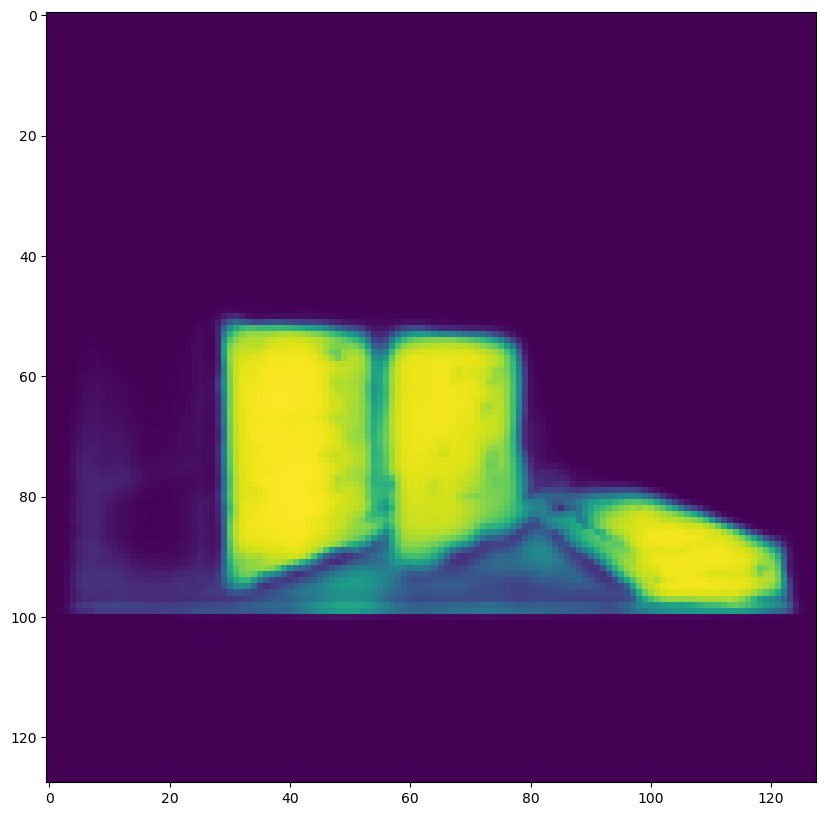

1280 720


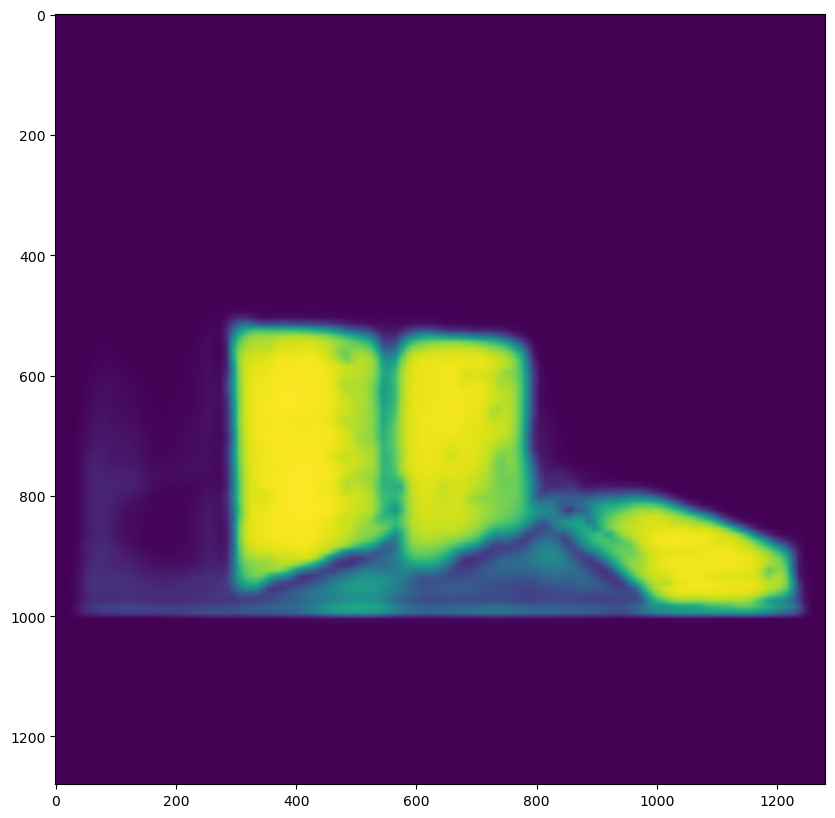

280
280 720 440


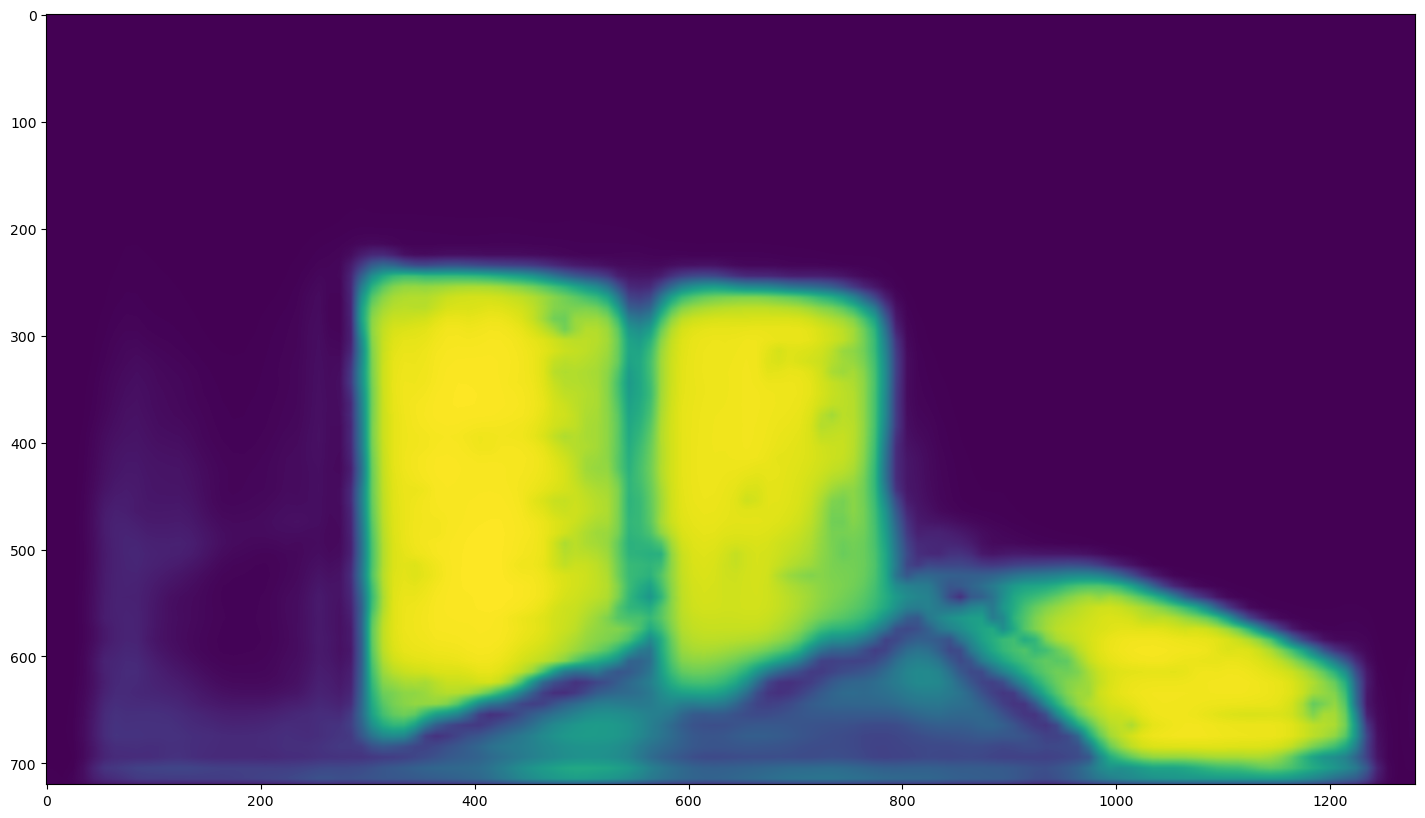

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=uint8)

In [10]:
sara.return_saliency(im.copy(), generator='fpn')

**FPN**

HERE


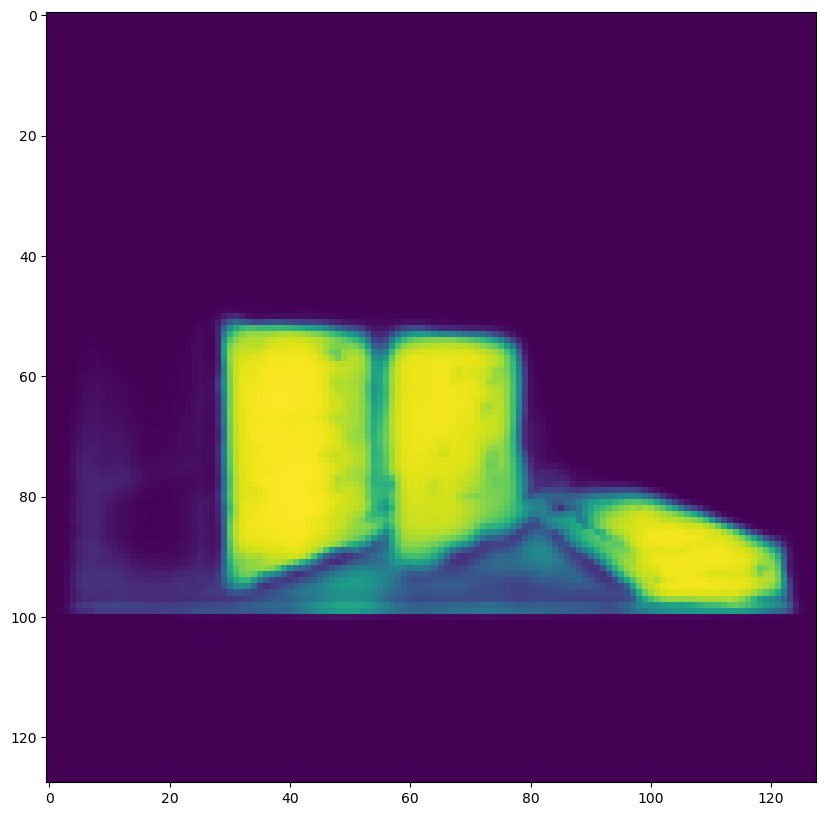

1280 720


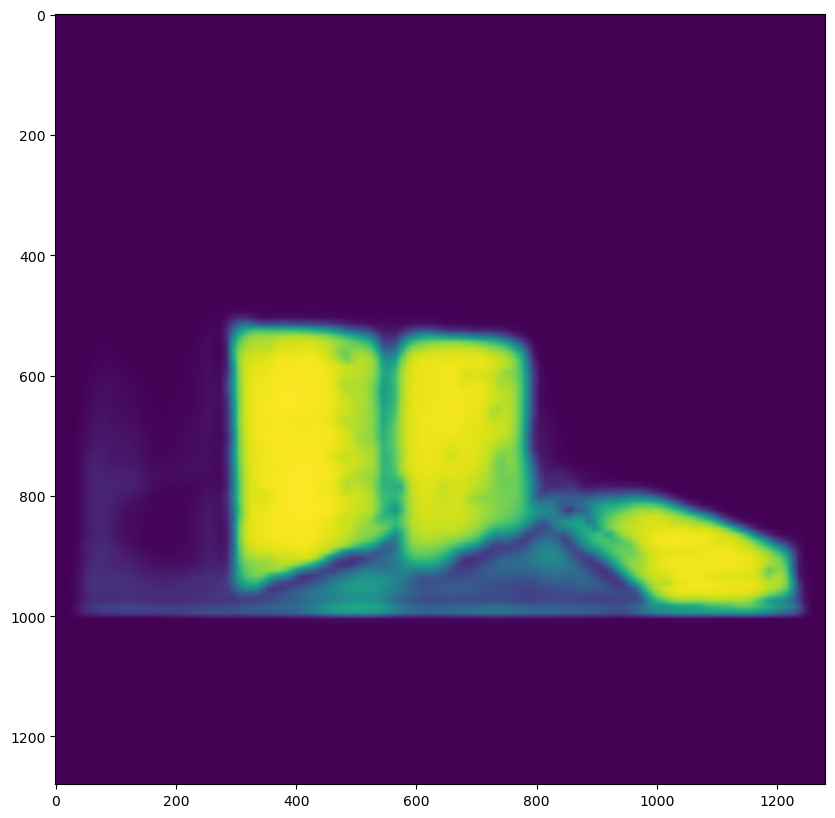

280
280 720 440


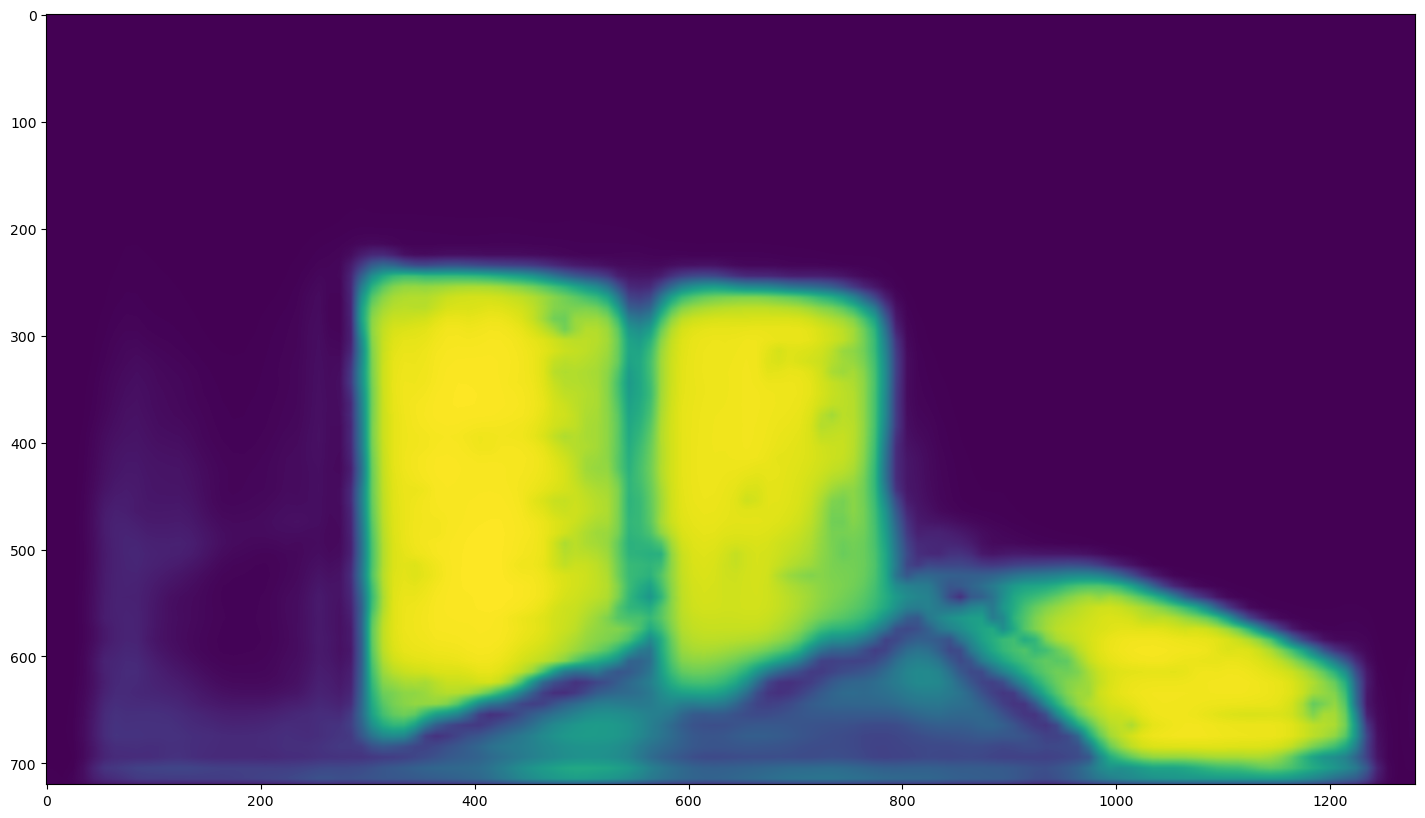

HERE


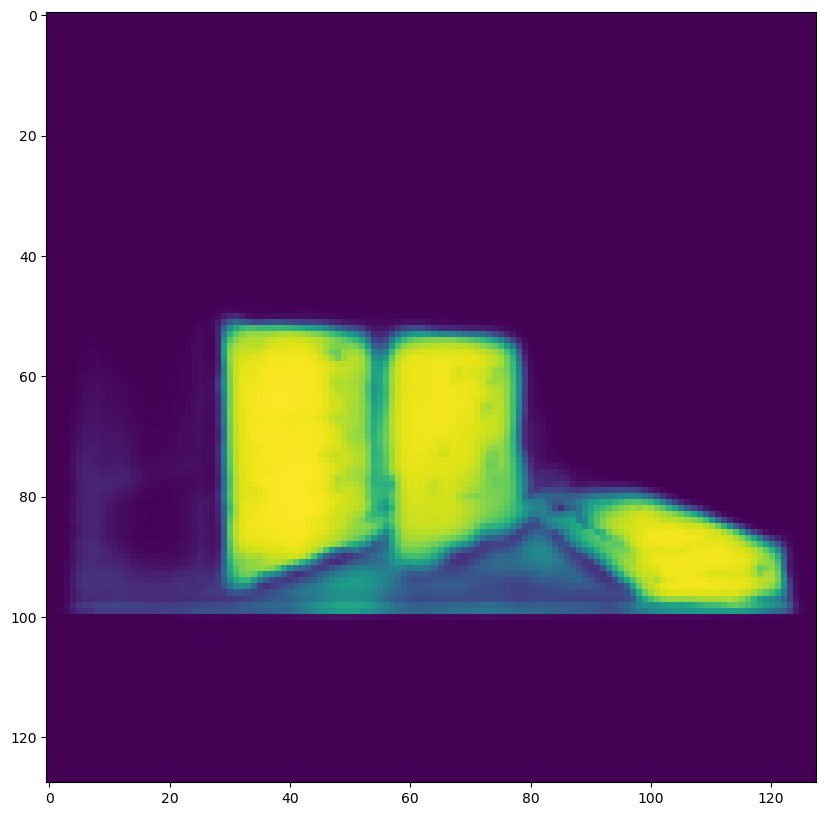

1280 720


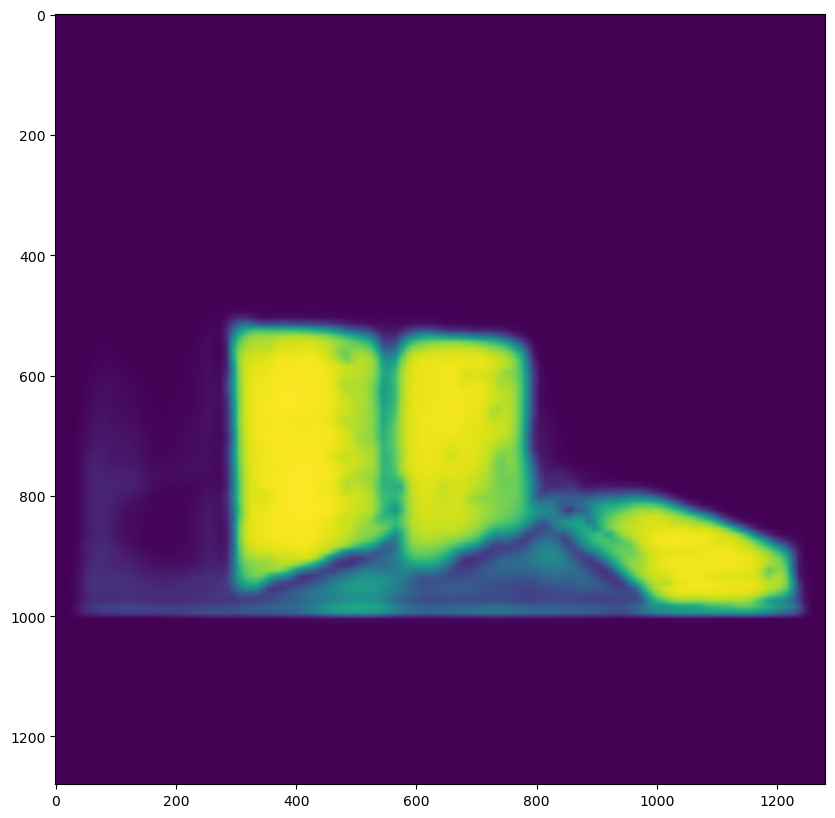

280
280 720 440


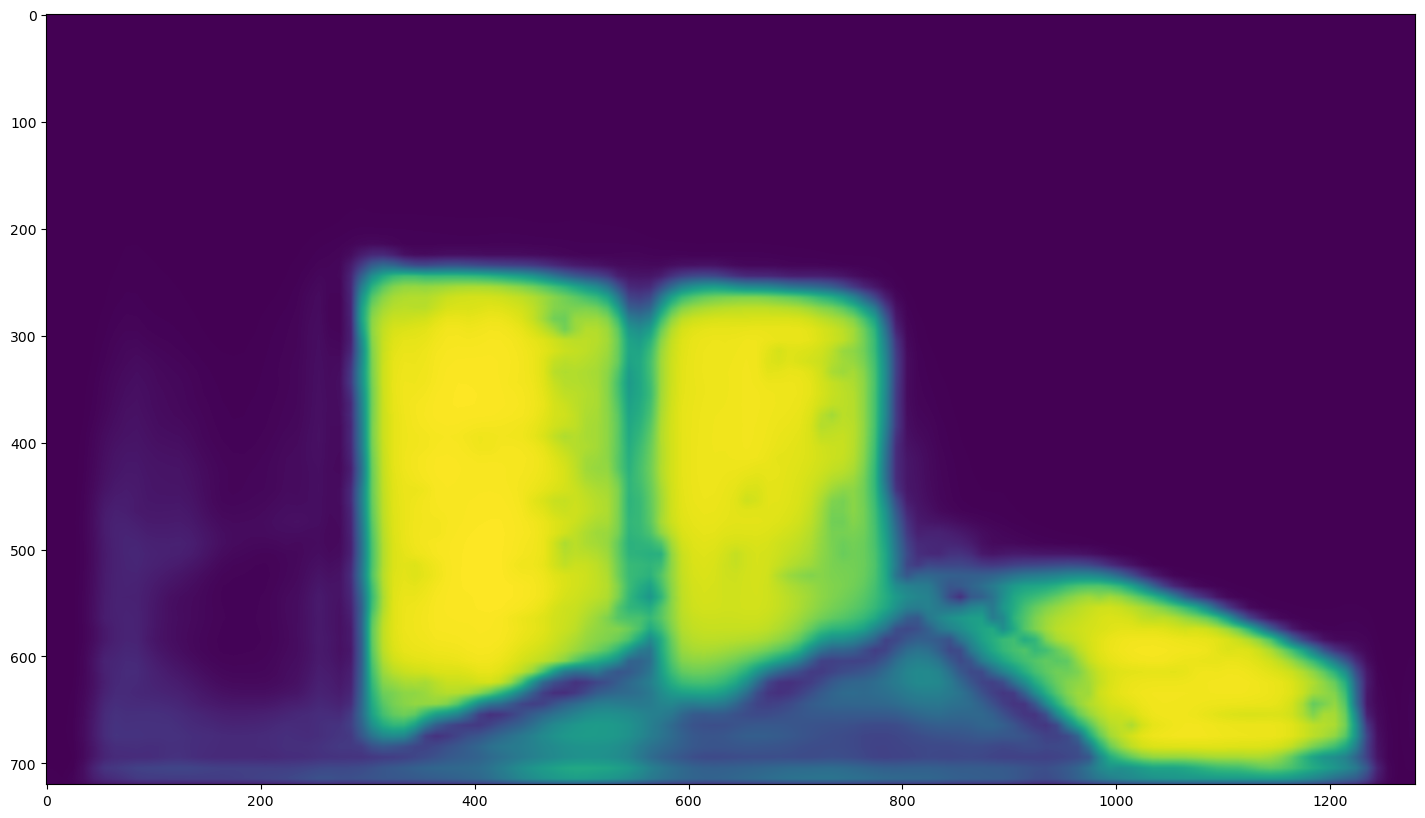

In [11]:
saliency_maps['fpn'] = sara.return_saliency(im.copy(), generator='fpn')
sara.reset()

sara_heatmaps['sara_fpn'] = sara.return_sara(im.copy(), grid_size, generator='fpn')
sara.reset()

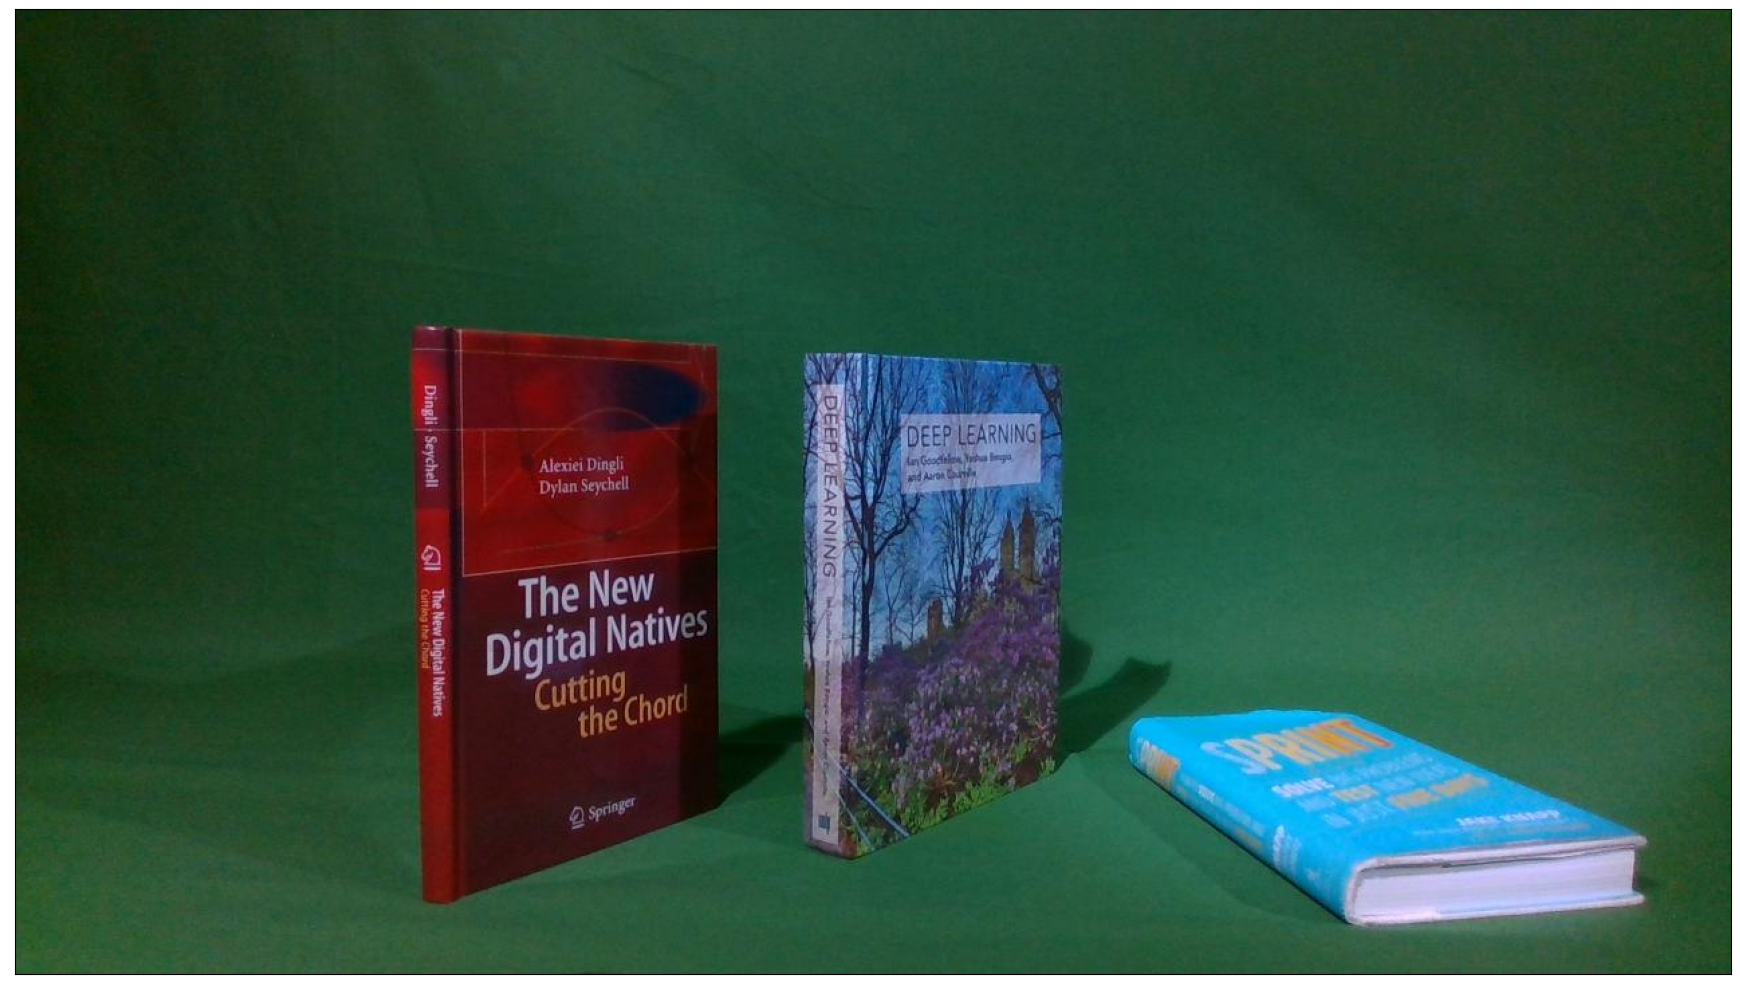

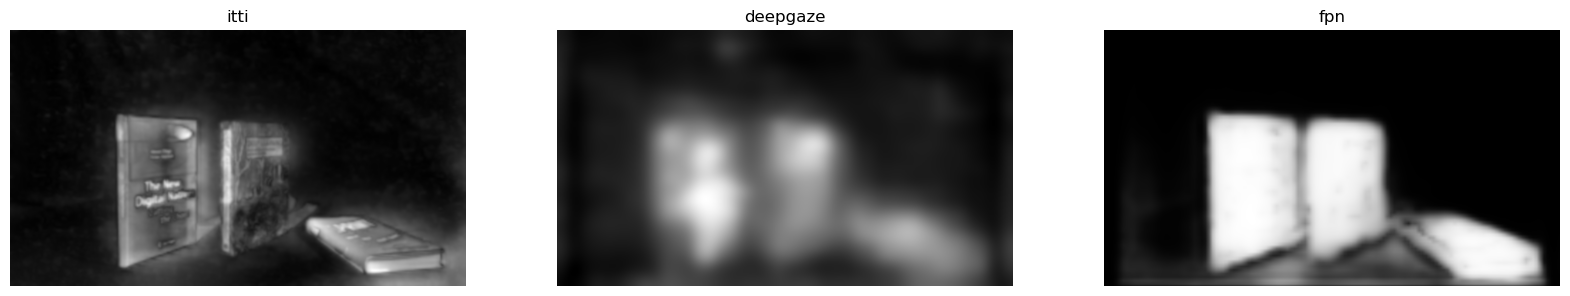

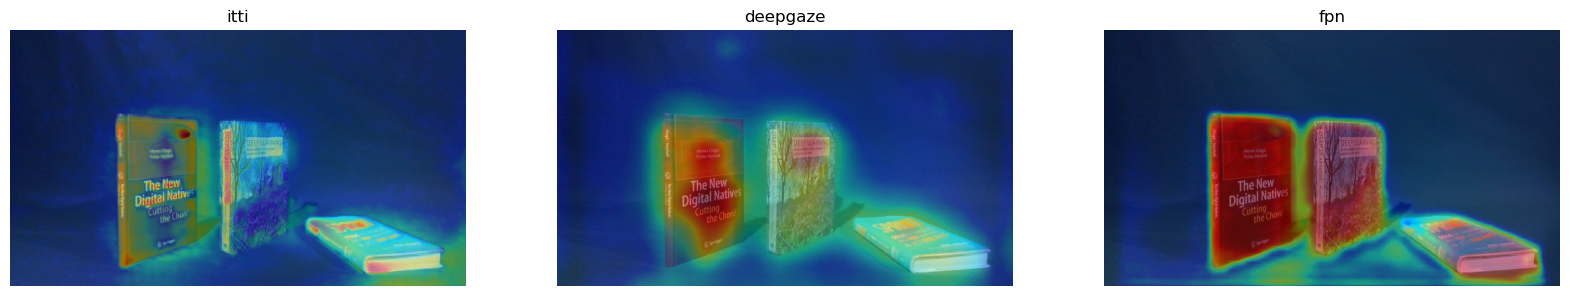

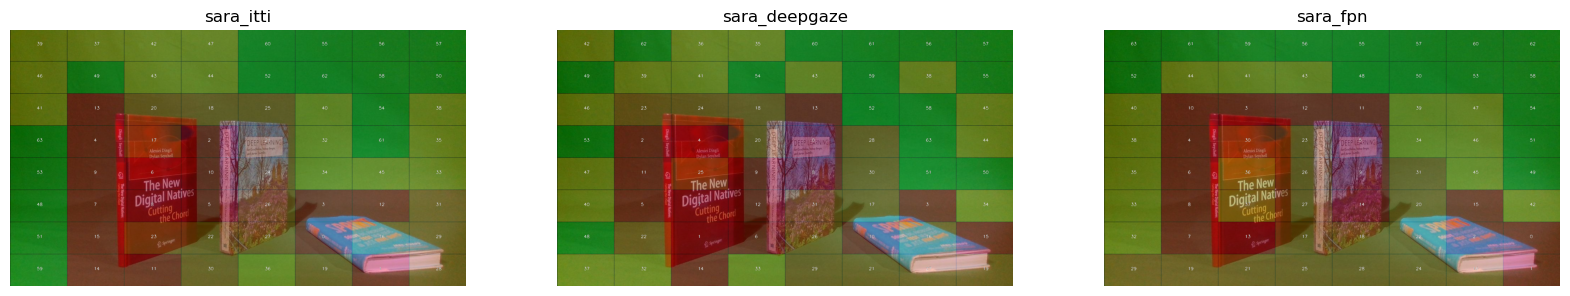

In [13]:
import os
imgs = []
# img_paths = []

# for root, dirs, files in os.walk("./images"):
#     for file in files:
#         img_paths.append(os.path.join(root, file))

# # Read all images
# for path in img_paths:
#     imgs.append(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB))

imgs.append(cv2.cvtColor(cv2.imread('./images/3_colour.jpeg'), cv2.COLOR_BGR2RGB))

num = 3

# Show original
plt.rcParams['figure.figsize'] = [20, 10]
plt.figure()
plt.imshow(im)
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

plt.figure()
for i, (k, v) in enumerate(saliency_maps.items()):
    plt.subplot(1, num, i+1)
    v = cv2.cvtColor(v, cv2.COLOR_BGR2RGB)
    plt.imshow(v, cmap='gray')
    plt.title(k)
    plt.axis('off')

for im in imgs:
    plt.figure()
    for i, (k, v) in enumerate(saliency_maps.items()):
        plt.subplot(1, num, i+1)
        # overlay heatmap on image
        plt.imshow(im)
        plt.imshow(v, cmap='jet', alpha=0.4)
        plt.title(k)
        plt.axis('off')

plt.figure()
for i, (k, v) in enumerate(sara_heatmaps.items()):
    heatmap, _ = v
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    plt.subplot(1, num, i+1)
    plt.imshow(heatmap, cmap='gray')
    plt.title(k)
    plt.axis('off')